				no_non_rotated		 SUN
Average angle: 92.02718445458534
converted angle: 1.9728155454146616
inverted


Extracted Text using EasyOCR (Rotated):
[([[570, 381], [682, 381], [682, 424], [570, 424]], 'HTTT', 0.18184176087379456), ([[699, 369], [841, 369], [841, 417], [699, 417]], 'HER', 0.06170263898958764), ([[112, 404], [269, 404], [269, 453], [112, 453]], '343r', 0.09346868097782135), ([[287, 397], [413, 397], [413, 437], [287, 437]], 'fa1', 0.16085003709819679), ([[576, 412], [843, 412], [843, 469], [576, 469]], 'GOVT OF INDIA', 0.748619239100878), ([[101, 436], [418, 436], [418, 496], [101, 496]], 'NNCOME TAX DEPARTMENT', 0.806909835574161), ([[349, 495], [601, 495], [601, 540], [349, 540]], 'tenail 7791 #TT &d', 0.023035223340085932), ([[303, 523], [643, 523], [643, 571], [303, 571]], 'Permanent Account Number Card', 0.9753909909434572), ([[365, 570], [574, 570], [574, 615], [365, 615]], 'DXHPP2537N', 0.9173112361499923), ([[109, 649], [143, 649], [143, 665], [109, 665]], '7', 0.677

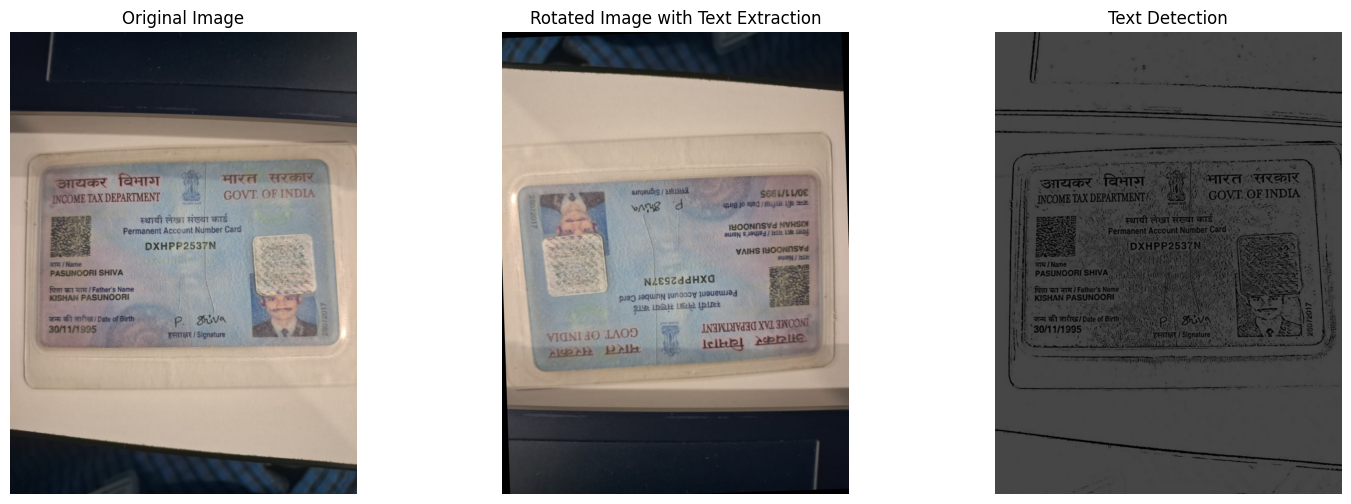

: 

In [24]:
# MAIN FUNCTION

import cv2
import re
from PIL import Image
import easyocr
import matplotlib.pyplot as plt
import numpy as np

# original_image = Image.open('pictures/venkatgiri pan1.jpg')
# original_image = Image.open('pictures/rc 2.jpg')
# original_image = Image.open('pictures/aadhaar shiva.jpg')
# original_image = Image.open("pictures/WhatsApp Image 2023-12-01 at 11.25.07_993c8e05.jpg")
# original_image = Image.open("pictures/sarath rc.jpg")
# original_image = Image.open("pictures/dl2.jpg")
# original_image = Image.open("pictures/MicrosoftTeams-image (14).png")
original_image = Image.open("pictures/rc 1 1.jpg")
original_image = Image.open("pictures/shiva pan.jpg")

cv_image = cv2.cvtColor(np.array(original_image), cv2.COLOR_RGB2BGR)

# Convert the image to grayscale
gray_image = cv2.cvtColor(cv_image, cv2.COLOR_BGR2GRAY)

scaled_image = cv2.resize(gray_image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)




# scaled_image = cv2.rotate(scaled_image, cv2.ROTATE_90_COUNTERCLOCKWISE)
# scaled_image = cv2.rotate(scaled_image, cv2.ROTATE_90_CLOCKWISE)


threshold_image = cv2.adaptiveThreshold(
    scaled_image,
    70,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    19,  # Block size
    2    # Constant subtracted from the mean
)

denoised_image = cv2.fastNlMeansDenoising(threshold_image, None, h=27, templateWindowSize=7, searchWindowSize=21)

reader = easyocr.Reader(['en'])
results = reader.readtext(denoised_image)

average_confidence = np.mean([result[2] for result in results])
pr_rotated_1 =""
pr_rotated = ""
result = [ [result[1],result[2]] for result in results]
a=0
for i in result:
    pr_rotated_1 += " " + (i[0])
    if re.search(r'[A-Za-z]{2}[0-9TOI]{2}[A-Za-z]{2}[0-9TOI]{4}$', i[0]):
        a = i[0][:2] + i[0][2:4].replace("T", "1").replace("O", "0").replace("I", "1")+i[0][4:6]+i[0][6:].replace("O", "0").replace("T", "1").replace("I", "1")
        print(i[0], "\t", a, "hi hello goodbye")
        break
    elif re.search(r'(([0-9TOI]{4}[\sO]{1}[0-9TOI]{4}[\sO]{1}[0-9TOI]{4}))', i[0]):
        a = i[0].replace("T", "1").replace("O", "0").replace("I", "1")
        print(i[0], "\t", a, "hi hello goodbye")
        break
    elif re.search(r'\b([A-Za-z]{5}[0-9TOI]{4}[A-Za-z]{1})\b', i[0]):
        a = i[0][:6] + i[0][6:10].replace("T", "1").replace("O", "0").replace("I", "1") + i[0][10:].replace("O", "0").replace("T", "1").replace("I", "1")
        print(i[0], "\t", a, "hi hello goodbye")
        break
    elif re.search(r'([A-Z]{2}[0-9TOI]{14}|[A-Z]{5}[0-9TOI]{15}|[A-Z]{2}[-\s]*[0-9TOI]{12}[-\s]*[0-9TOI]{5})', i[0]):
        a = i[0][:2] + i[0][2:].replace("T", "1").replace("O", "0").replace("I", "1")
        print(i[0], "\t", a, "hi hello goodbye")
        break
    else:
        print("\t\t\t\tno_non_rotated\t\t",i[0])

    # If average confidence is less than 0.7, rotate the image by 180 degrees and perform text extraction again
if a == 0:


    gray_image = denoised_image

    # Use Canny edge detection
    edges = cv2.Canny(gray_image, 50, 150, apertureSize=3)

    # Find contours in the image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the orientation angle of the text
    angle_sum = 0
    count = 0
    for contour in contours:
        if cv2.contourArea(contour) > 100:  # You can adjust the area threshold as needed
            _, _, angle = cv2.fitEllipse(contour)
            angle_sum += angle
            count += 1

    average_angle = angle_sum / count if count > 0 else 0
    print("Average angle: {}".format(average_angle))
    average_angle = -average_angle + 90 + 4 if average_angle > 90 else average_angle + 4
    print("converted angle: {}".format(average_angle))
    average_angle = average_angle + 180
    # Rotate the image by the calculated angle
    rows, cols, _ = cv_image.shape
    rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), average_angle, 1)
    rotated_image = cv2.warpAffine(cv_image, rotation_matrix, (cols, rows))

    rows, cols, _ = cv_image.shape
    rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), average_angle, 1)
    rotated_image_180 = cv2.warpAffine(cv_image, rotation_matrix, (cols, rows))

    # Convert back to PIL format
    rotated_image_pil = Image.fromarray(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))

    # Use EasyOCR for text extraction with adjusted configuration on rotated image
    reader = easyocr.Reader(['en'])
    results_rotated = reader.readtext(rotated_image)
    # Check average confidence
    average_confidence = np.mean([result[2] for result in results_rotated])

    # If average confidence is less than 0.7, rotate the image by 180 degrees and perform text extraction again
    if average_confidence < 0.7:
        print("inverted")
        rotated_image_180 = cv2.rotate(rotated_image, cv2.ROTATE_180)
        results_rotated = reader.readtext(rotated_image_180)

    # Display the original, rotated, and text detection images using Matplotlib
    plt.figure(figsize=(18, 6))

    # Original Image
    plt.subplot(1, 3, 1)
    plt.imshow(original_image)
    plt.title('Original Image')
    plt.axis('off')

    # Rotated Image
    plt.subplot(1, 3, 2)
    plt.imshow(rotated_image_pil)
    plt.title('Rotated Image with Text Extraction')
    plt.axis('off')

    # Text Detection (Visualization only)
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
    plt.title('Text Detection')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))
    plt.title('Text Detection')
    plt.axis('off')





    # Extracted Text using EasyOCR (Rotated)
    print("\n")
    print("Extracted Text using EasyOCR (Rotated):")
    print(results_rotated)
    print("\n")
    pr_rotated = ""
    extracted_text_easyocr_rotated = [[result[1], result[2]] for result in results_rotated]

    for i in extracted_text_easyocr_rotated:
        pr_rotated += " " + (i[0])
        
        if re.search(r'[A-Za-z]{2}[0-9TOI]{2}[A-Za-z]{2}[0-9TOI]{4}$', i[0]):
            a = i[0][:2] + i[0][2:4].replace("T", "1").replace("O", "0").replace("I", "1")+i[0][4:6]+i[0][6:].replace("O", "0").replace("T", "1").replace("I", "1")
            print(i[0], "\t", a, "hi hello goodbye")
            break
        elif re.search(r'(([0-9TOI]{4}[\sO]{1}[0-9TOI]{4}[\sO]{1}[0-9TOI]{4}))', i[0]):
            a = i[0].replace("T", "1").replace("O", "0").replace("I", "1")
            print(i[0], "\t", a, "hi hello goodbye")
            break
        elif re.search(r'\b([A-Za-z]{5}[0-9TOI]{4}[A-Za-z]{1})\b', i[0]):
            a = i[0][:6] + i[0][6:10].replace("T", "1").replace("O", "0").replace("I", "1") + i[0][10:].replace("O", "0").replace("T", "1").replace("I", "1")
            print(i[0], "\t", a, "hi hello goodbye")
            break
        elif re.search(r'([A-Z]{2}[0-9TOI]{14}|[A-Z]{5}[0-9TOI]{15}|[A-Z]{2}[-\s]*[0-9TOI]{12}[-\s]*[0-9TOI]{5})', i[0]):
            a = i[0][:2] + i[0][2:].replace("T", "1").replace("O", "0").replace("I", "1")
            print(i[0], "\t", a, "hi hello goodbye")
            break
        else:
            print("\t\t\t\tno\t\t",i[0])














i[0] = pr_rotated_1
if a == 0:
    print("\n\n\n",pr_rotated_1,"\n\n\n")
    if re.search(r'[A-Za-z]{2}[0-9TOI]{2}[A-Za-z]{2}[0-9TOI]{4}$', i[0]):
        i[0] = [re.search(r'[A-Za-z]{2}[0-9TOI]{2}[A-Za-z]{2}[0-9TOI]{4}$', i[0]).group()][0]
        a = i[0][:2] + i[0][2:4].replace("T", "1").replace("O", "0").replace("I", "1")+i[0][4:6]+i[0][6:].replace("O", "0").replace("T", "1").replace("I", "1")
        print(i[0], "\t", a, "hi hello goodbye")
        
    elif re.search(r'(([0-9TOI]{4}[\sO]{1}[0-9TOI]{4}[\sO]{1}[0-9TOI]{4}))', i[0]):
        i[0] = [re.search(r'(([0-9TOI]{4}[\sO]{1}[0-9TOI]{4}[\sO]{1}[0-9TOI]{4}))', i[0]).group()][0]
        a = i[0].replace("T", "1").replace("O", "0").replace("I", "1")
        print(i[0], "\t", a, "hi hello goodbye")
        
    elif re.search(r'\b([A-Za-z]{5}[0-9TOI]{4}[A-Za-z]{1})\b', i[0]):
        i[0] = [re.search(r'\b([A-Za-z]{5}[0-9TOI]{4}[A-Za-z]{1})\b', i[0])].group()[0]
        a = i[0][:6] + i[0][6:10].replace("T", "1").replace("O", "0").replace("I", "1") + i[0][10:].replace("O", "0").replace("T", "1").replace("I", "1")
        print(i[0], "\t", a, "hi hello goodbye")
        
    elif re.search(r'([A-Z]{2}[0-9TOI]{14}|[A-Z]{5}[0-9TOI]{15}|[A-Z]{2}[-\s]*[0-9TOI]{12}[-\s]*[0-9TOI]{5})', i[0]):
        i[0] = [re.search(r'([A-Z]{2}[0-9TOI]{14}|[A-Z]{5}[0-9TOI]{15}|[A-Z]{2}[-\s]*[0-9TOI]{12}[-\s]*[0-9TOI]{5})', i[0]).group()][0]
        a = i[0][:2] + i[0][2:].replace("T", "1").replace("O", "0").replace("I", "1")
        print(i[0], "\t", a, "hi hello goodbye")
        
i[0] = pr_rotated

if a==0:
    print(pr_rotated)
    if re.search(r'[A-Za-z]{2}[0-9TOI]{2}[A-Za-z]{2}[0-9TOI]{4}$', pr_rotated):
        i[0] = [re.search(r'[A-Za-z]{2}[0-9TOI]{2}[A-Za-z]{2}[0-9TOI]{4}$', pr_rotated).group()][0]
        a = i[0][:2] + i[0][2:4].replace("T", "1").replace("O", "0").replace("I", "1")+i[0][4:6]+i[0][6:].replace("O", "0").replace("T", "1").replace("I", "1")
        print(i[0], "\t", a, "hi hello goodbye")
        
    elif re.search(r'(([0-9TOI]{4}[\sO]{1}[0-9TOI]{4}[\sO]{1}[0-9TOI]{4}))', i[0]):
        aadhaar_card = [re.search(r'(([0-9TOI]{4}[\sO]{1}[0-9TOI]{4}[\sO]{1}[0-9TOI]{4}))', i[0]).group()][0]
        a = aadhaar_card.replace("T", "1").replace("O", "0").replace("I", "1")
        print(i[0], "\t", a, "hi hello goodbye")
        
    elif re.search(r'\b([A-Za-z]{5}[0-9TOI]{4}[A-Za-z]{1})\b', i[0]):
        i[0] = [re.search(r'\b([A-Za-z]{5}[0-9TOI]{4}[A-Za-z]{1})\b', i[0]).group()][0]
        a = i[0][:6] + i[0][6:10].replace("T", "1").replace("O", "0").replace("I", "1") + i[0][10:].replace("O", "0").replace("T", "1").replace("I", "1")
        print(i[0], "\t", a, "hi hello goodbye")
        
    elif re.search(r'([A-Z]{2}[0-9TOI]{14}|[A-Z]{5}[0-9TOI]{15}|[A-Z]{2}[-\s]*[0-9TOI]{12}[-\s]*[0-9TOI]{5})', i[0]):
        i[0] = [re.search(r'([A-Z]{2}[0-9TOI]{14}|[A-Z]{5}[0-9TOI]{15}|[A-Z]{2}[-\s]*[0-9TOI]{12}[-\s]*[0-9TOI]{5})', i[0]).group()][0]
        a = i[0][:2] + i[0][2:].replace("T", "1").replace("O", "0").replace("I", "1")
        print(i[0], "\t", a, "hi hello goodbye")
    

print("\n")
print("\n")
print(a )
